# Statistische Methoden für Umformtechniker

------------

Max Weiner

IMF-Kolloquium, 2022-11-01

![](qr.png)

## Inhalt

1. Motivation
2. Werkzeuge
3. Histogramme, Kennwerte, Verteilungen
4. Regression
5. Zusammenfassung

## Motivation

- schlechte/unpassende Ausbildung im Studium
- vebreitete Abneigung gegen das Thema
- Unwissenheit gefährlich
- aber: gewisse Grundkenntnisse im Ingenieursalltag äußerst nützlich

## Werkzeuge

1. **kein** Excel
2. Python
3. `numpy` - Vektoren, Matrizen, Listen
4. `scipy` - Interpolation, Optimierung, ...
5. `pandas` - Statistik
6. `matplotlib` - Plots

## Histogramme, Kennwerte, Verteilungen

### Laden von Daten mit `pandas`

`pandas` enthält viele Funktionen zum Einlesen gängiger Datenformate, z.B. CSV

In [21]:
import pandas as pd

data = pd.read_csv("pauses.csv", header=0)
data

,duration
0,5.955
1,4.509
2,5.556
3,5.552
4,4.636
...,...
77,4.661
78,4.238
79,5.211
80,5.495


In [22]:
series = data["duration"]  # Auswahl einer Spalte

### Plot eines Histogramms mit `matplotlib`

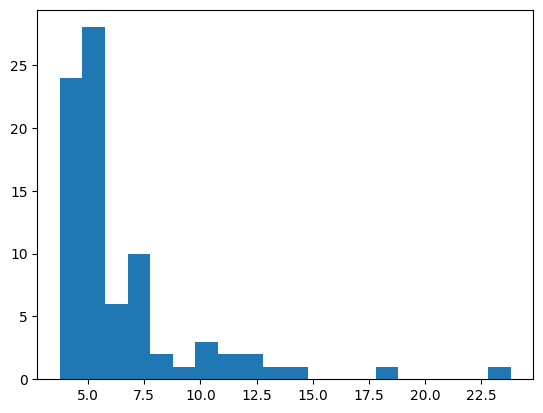

In [23]:
import matplotlib.pyplot as plt

plt.hist(series, bins=20)
plt.show()

### Berechnung von Kennwerten der Datenreihe

In [24]:
series.mean()  # Mittelwert

6.505670731707317

In [25]:
series.std()  # Standardabweichung

3.310100815498286

In [26]:
series.skew()  # Schiefe

2.8879467395305483

### Modellierung der Daten durch eine Normalverteilung

- Normalverteilungen sind der am weitesten verbreitete Ansatz zur Beschreibung von Daten
- In Natur und Technik treten häufig annähernd normalverteilte Daten auf

In [27]:
from scipy import stats

norm = stats.norm(loc=series.mean(), scale=series.std())

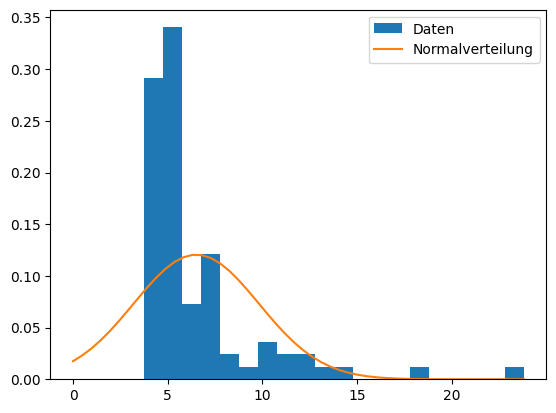

In [28]:
import numpy as np

x = np.linspace(0, series.max(), 50)
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label="Normalverteilung")
plt.legend();
plt.show()

### Passt die Normalverteilung auf meine Daten?

- in Statistikvorlesungen werden häufig Normalitätstests gelehrt
    
> Normalitätstest haben zwei mögliche Aussagen: 1) ich habe zu wenig Daten 2) meine Daten sind nicht Normalverteilt.
> 
> *Allan Downey*

- Frage ist **nicht**: Sind meine Daten normalverteilt?
- **Sondern**: Ist die Normalverteilung eine ausreichende Näherung an meine Daten?

$\rightarrow$ genaue Aussagen schwierig, aber einfache Daumenregeln!

- einfachste Möglichkeit: Histogramme und Summenhäufigkeiten betrachten und optisch abschätzen

## Summenhäufigkeitsverteilungen sind besser als Histogramme!

- gerade bei kleiner Datenlage

<img src="1695.png" width="800px"/>

### Exponentialverteilung

Zerfallsprozesse, Lebensdauern.

### Gamma-Verteilung

Verallgemeinerte Exponentialverteilung.

$$ k = \frac{\mu^2}{\sigma^2} \quad \theta = \frac{\sigma^2}{\mu} $$

### Lognormalverteilung

Für Daten, deren Logarithmus normalverteilt ist.

### Beta-Verteilung

Für Daten mit Definitionsbereich $[0, 1]$ oder darauf skalierbarem.

$$ \alpha = \mu \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] \quad \beta = (1-\mu) \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] $$

In [29]:
k = series.mean() ** 2 / series.std() ** 2;
print("k =", k)
theta = series.std() ** 2 / series.mean();
print("θ =", theta)

gamma = stats.gamma(a=k, scale=theta)

k = 3.862795484327411
θ = 1.6841872053808935


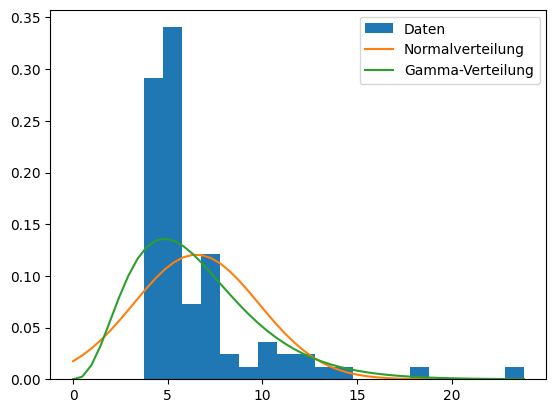

In [30]:
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label="Normalverteilung")
plt.plot(x, gamma.pdf(x), label="Gamma-Verteilung")
plt.legend();
plt.show()

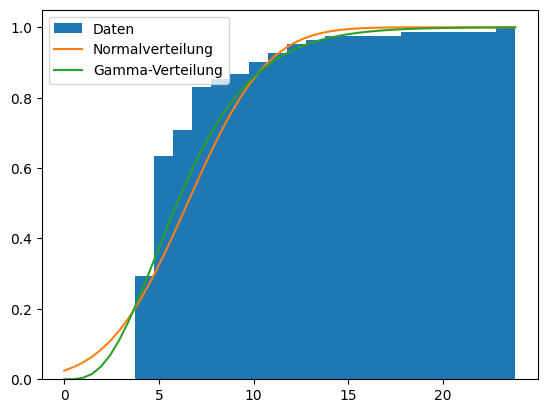

In [31]:
plt.hist(series, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x, norm.cdf(x), label="Normalverteilung")
plt.plot(x, gamma.cdf(x), label="Gamma-Verteilung")
plt.legend();
plt.show()

- Auffällig: keine Datenpunkte unterhalb von ca. 3.74 s
- Zeit benötigt zum Zustellen des Walzspaltes
- Berücksichtigung solcher Auffälligkeiten kann Modell der Verteilung stark verbessern.

$\rightarrow$ Prozesskentniss zur Interpretation der Daten notwendig!

In [32]:
series2 = series - series.min()

k2 = series2.mean() ** 2 / series2.std() ** 2;
print("k2 =", k2, "\tk =", k)
theta2 = series2.std() ** 2 / series2.mean();
print("θ2 =", theta2, "\tθ =", theta)

gamma2 = stats.gamma(a=k2, scale=theta2)

k2 = 0.6945720322485311 	k = 3.862795484327411
θ2 = 3.9717561370513295 	θ = 1.6841872053808935


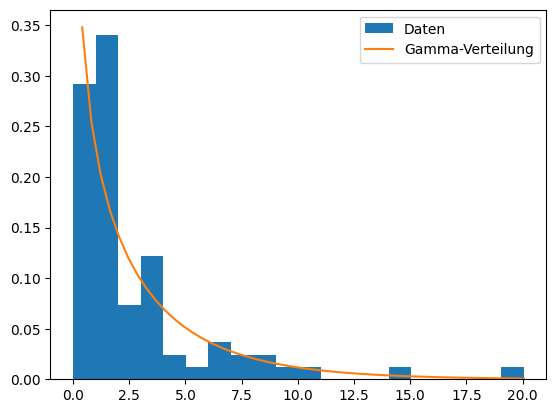

In [33]:
x2 = np.linspace(0, series2.max(), 50)
plt.hist(series2, bins=20, density=True, label="Daten")
plt.plot(x2, gamma2.pdf(x2), label="Gamma-Verteilung")
plt.legend();
plt.show()

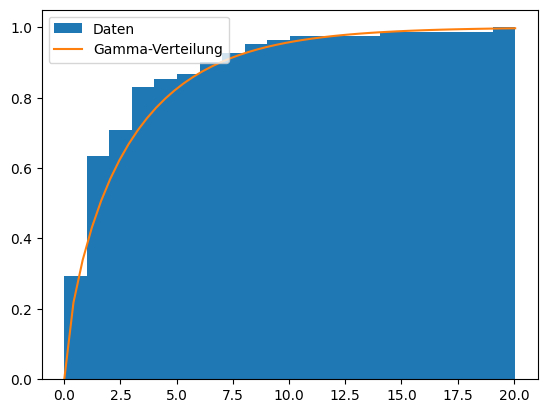

In [34]:
plt.hist(series2, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x2, gamma2.cdf(x2), label="Gamma-Verteilung")
plt.legend();
plt.show()

## Vergleich zweier Datenreihen

- häufiger Fall zur Beurteilung des Einflusses eines Parameters
- Einfluss qualitativ im Histogramm sichtbar
- Frage nach quantitativer Betrachtung

<img src="comp.png" width="600px"/>

## Cohen's Effektgröße

- Maß für den Unterschied zwischen zwei Verteilungen
- Differenz der Erwartungswerte bezogen auf deren Standardabweichung

$$ d = \frac{\mu_1 - \mu_2}{\sigma^\star} $$

$$ \sigma^\star = \sqrt{\frac{(n_1-1)\sigma_1^2+(n_2-1)\sigma_2^2}{n_1+n_2-2}} $$

Daumenregeln zur Klassfikation der Werte von $d$ [[Sawilowski2009](https://doi.org/10.22237/jmasm/1257035100)]:

- 0.2 kleiner Effekt
- 0.5 mittlerer Effekt
- 0.8 großer Effekt
- 1.2 sehr großer Effekt
- 2.0 riesiger Effekt

## Regression



In [35]:
fk_data = pd.read_csv("bst_fk.csv")
fk_data

,temperature,strain_rate,strain,flow_stress
0,800.0,0.1,0.000000,50.501127
1,800.0,0.1,0.000852,52.675668
2,800.0,0.1,0.001716,54.850114
3,800.0,0.1,0.002588,57.024493
4,800.0,0.1,0.003571,59.197453
...,...,...,...,...
3629,1200.0,0.1,1.139796,43.190352
3630,1200.0,0.1,1.151343,43.360666
3631,1200.0,0.1,1.162929,43.521279
3632,1200.0,0.1,1.174562,43.669921


In [36]:
def f(temp, phi, phid, c):
    _phi = phi + 0.01
    _phid = phid + 0.01
    return (
            c[0] * np.exp(c[1] * temp) * temp ** c[9]
            * _phi ** c[2] * np.exp(c[4] / _phi)
            * (1 + _phi) ** (c[5] * temp + c[6])
            * np.exp(c[7] * _phi)
            * _phid ** (c[3] + c[8] * temp)
    )


In [37]:
from scipy.optimize import least_squares

c0 = [1e3, -1e-3, -1e-2, 1, -1, 0, 0, 0, 0, 0]


def error(c):
    return f(
        fk_data["temperature"], fk_data["strain"],
        fk_data["strain_rate"], c
    ) - fk_data["flow_stress"]


fit = least_squares(error, c0)

In [38]:
fit.success

True

In [39]:
fit.x

array([ 5.42004145e+01, -3.48934034e-03,  4.54248620e-01, -5.61377334e-02,
        5.91639079e-05, -6.57137902e-04, -1.03175835e+00,  3.46979516e-02,
        1.98522396e-04,  7.56404648e-01])

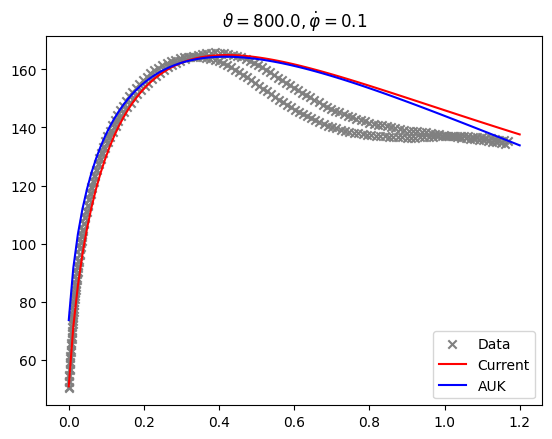

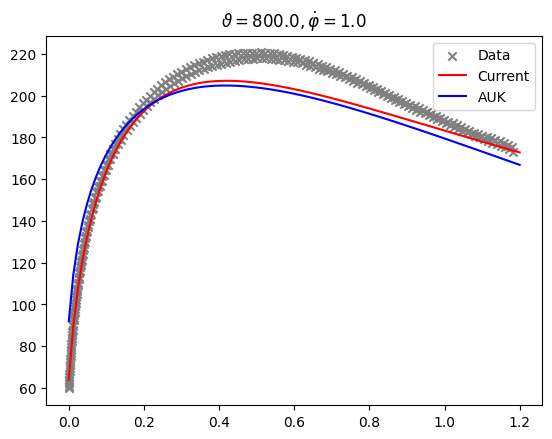

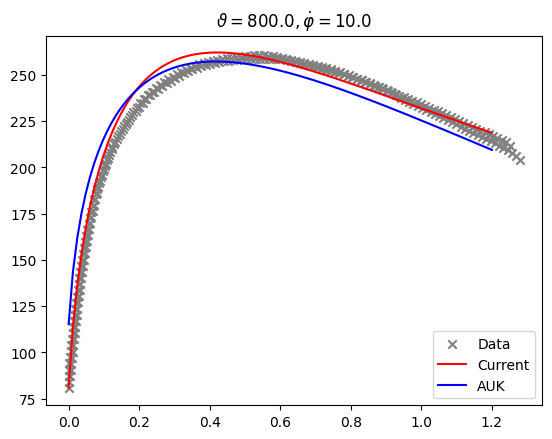

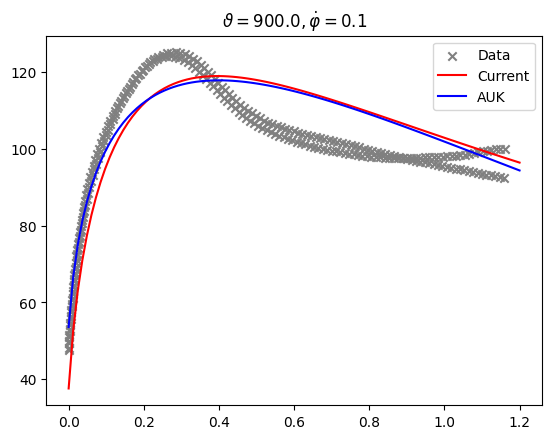

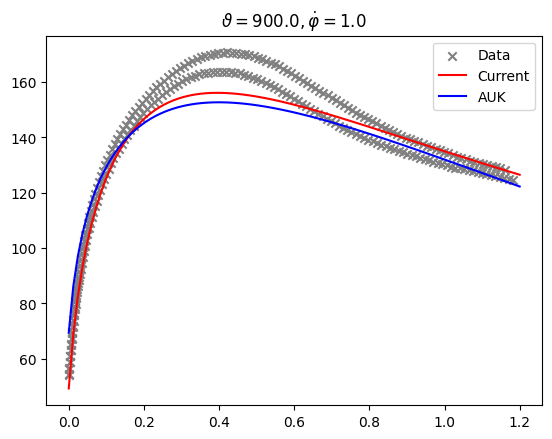

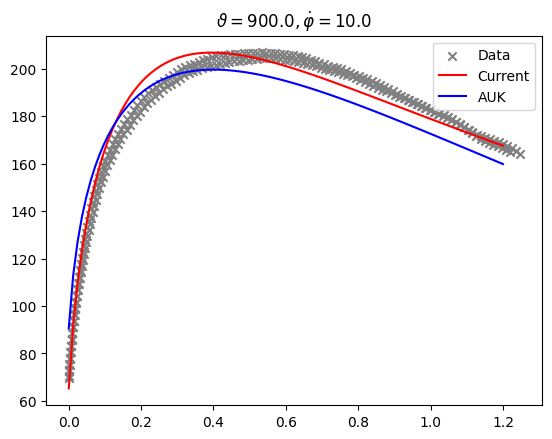

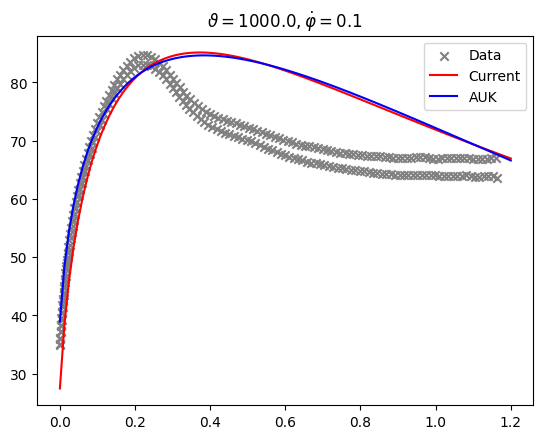

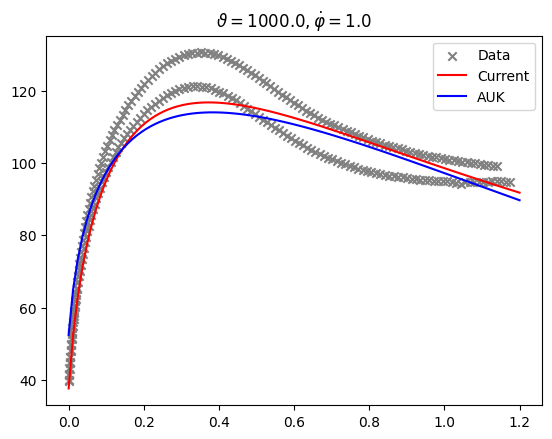

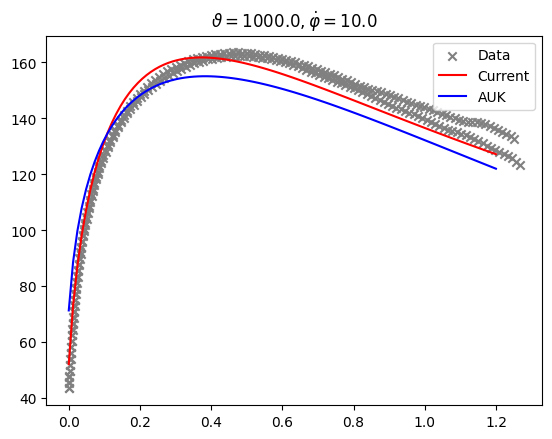

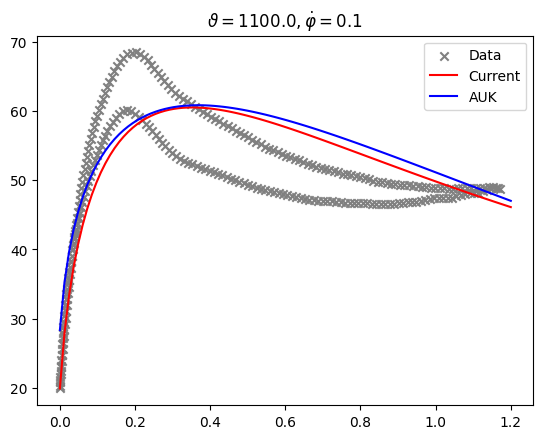

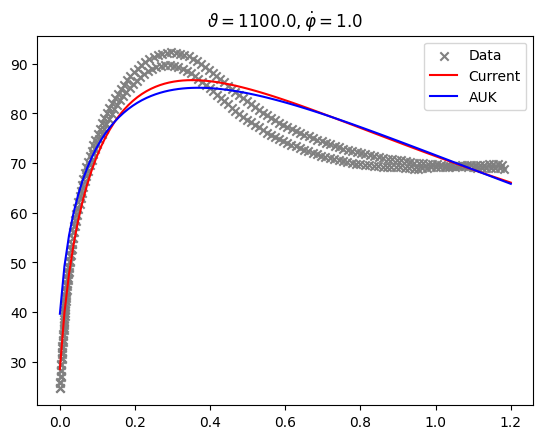

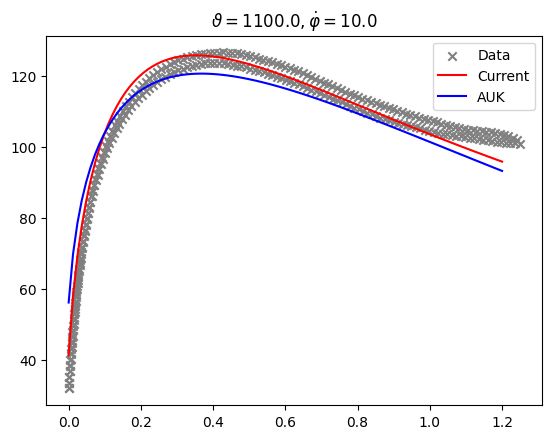

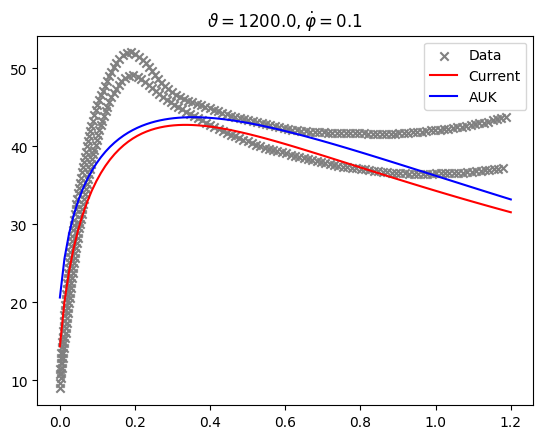

In [40]:
strain = np.linspace(0, 1.2, 100)

for n, g in fk_data.groupby(["temperature", "strain_rate"]):
    plt.title(fr"$\vartheta = {n[0]}, \dot{{\varphi}} = {n[1]}$")
    plt.scatter(g["strain"], g["flow_stress"], label="Data", marker="x", c="gray")
    plt.plot(strain, f(n[0], strain, n[1], fit.x), c="r", label="Current")
    plt.plot(strain, f(n[0], strain, n[1],
                       [4.88e3, -0.00273339, 0.302309, -0.0407581, 0.000222222, -0.000383134, 0, -0.492672, 0.000175044,
                        -0.0611783]), c="b", label="AUK")
    plt.legend()
    plt.show()
